## Final Project Submission

Please fill out:
* Student name: JOHN KIOKO
* Student pace: full time
* Scheduled project review date/time: Fri, Sep 15, 2023
* Instructor name: Lucille Kahela
* Blog post URL:


## Introduction

#### a) Business Problem

>Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office.

>Problem Statement: You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

#### b) Main Objective
Finding the types of films that are doing best at the box office and use the data to create a new movie studio

#### c) Other Objectives

* To determine the relationships between genres and various predictor variables ( using gross, rating and the number of votes)
* Determine the relationships between the Movie_titles and predicting values (like rating, gross, and number of votes)
* Determin how average rating and number of votes will affect movies to be produced

## Data Understanding

## Loading Libraries, Datasets and Understanding Them

### Loading Libraries

In [1]:
# Your code here - remember to use markdown cells for comments as well!
# importing necessary libraries
import pandas as pd
import numpy as np
import csv
import shutil
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#Establishing a connection (Sqlite Dataset)
import sqlite3
conn = sqlite3.connect('im.db')

import warnings
warnings.filterwarnings('ignore')

### Loading DATASETS

In [2]:
# Loading the datasets

bom_movie_gross = pd.read_csv('bom.movie_gross.csv')
rt_movie_info = pd.read_csv('rt.movie_info.tsv', sep='\t')
rt_reviews = pd.read_csv('rt.reviews.tsv', sep='\t', encoding= 'latin1')
tmdb_movies = pd.read_csv('tmdb.movies.csv')
movie_budgets = pd.read_csv('tn.movie_budgets.csv')

### Cleaning Datasets and Previewing them (Data UNDERSTANDING)

In [3]:
# checking the movie budgets dataset
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


The foreign gross has a few nan values 

In [4]:
# Further data preview (Box office mojo dataset)
bom_movie_gross.shape

(3387, 5)

In [5]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Observations
The foreign Gross is supposed to be a number but it has an object value instead
There are also missing rows in this data set

In [6]:
# Data Preview (Box office mojo dataset)
bom_movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Since the number of missing values in the foreign gross is alot. There's a need to drop this column

In [7]:
# Dropping the FG and the Studio Nan Values (Box Office Mojo)
bom_movie_gross.dropna(subset=['studio', 'foreign_gross'], inplace=True)

In [8]:
bom_movie_gross.isna().sum()

title              0
studio             0
domestic_gross    26
foreign_gross      0
year               0
dtype: int64

There are no Nan Values again in our mojo dataset

In [9]:
# Checking for Duplicate values
duplicates = bom_movie_gross[bom_movie_gross.duplicated()]
len(duplicates)

0

The mojo dataset doesn't contain duplicates

In [10]:
# Changinge the title 'column' to 'movie_title'
bom_movie_gross = bom_movie_gross.rename(columns = {'title':'movie_title'})
bom_movie_gross

,movie_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [11]:
#Checking the rotten tomatoes dataset
rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [12]:
#Further data preview (Rotten Tomatoes)
rt_movie_info.shape

(1560, 12)

In [13]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [14]:
rt_movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [15]:
rt_movie_info.dropna(subset=['synopsis', 'director', 'writer', 'theater_date', 'dvd_date', 'runtime', 'studio',  'currency', 'rating', 'genre', 'box_office'], inplace=True)

In [16]:
rt_movie_info.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [17]:
duplicates = rt_movie_info[rt_movie_info.duplicated()]
len(duplicates)

0

In [18]:
rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,"Dec 23, 2011","Apr 3, 2012",$,"72,700,000",126 minutes,20th Century Fox
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016","Jun 21, 2016",$,"1,320,005",123 minutes,Buffalo Films
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,"25,335,935",119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,"1,416,189",129 minutes,Eros Entertainment


In [19]:
# Further data preview (tmdb_movies)
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


From the above Output the Movie Database has some anomalies, it has an unnamed column and repeated movie titles

In [20]:
tmdb_movies.shape

(26517, 10)

In [21]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [22]:
# finding nan values in the movie database
tmdb_movies.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

The above dataset doesnt have any Nan Values

In [23]:
# Renaming columns
tmdb_movies = tmdb_movies.rename(columns = {'original_language':'language', 'original_title':'original_movie_title', 'title':'movie_title'})

In [24]:
tmdb_movies

,Unnamed: 0,genre_ids,id,language,original_movie_title,popularity,release_date,movie_title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [25]:
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [26]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [27]:
rt_reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [28]:
rt_reviews = rt_reviews.rename(columns = {'id':'movie_id', 'rating':'critic_rating', 'review':'critic_review'})
rt_reviews

,movie_id,critic_review,critic_rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [29]:
rt_reviews

,movie_id,critic_review,critic_rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [30]:
# Checking the tables in the sql dataset
df = """

SELECT name FROM sqlite_master 
WHERE type = "table"
;
"""

pd.read_sql (df, conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [31]:
#Examaning The Movie_basics table (imdb)

df = """

SELECT *
FROM movie_basics
;
"""

pd.read_sql (df, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [32]:
pd.read_sql (df, conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [33]:
pd.read_sql (df, conn).isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

The Above table shows that the movie_basics table has Nan Values

In [34]:
# Examanining the movie_ratings

df = """

SELECT *
FROM movie_ratings
;
"""

pd.read_sql (df, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [35]:
df = """

SELECT *
FROM movie_ratings
;
"""

pd.read_sql (df, conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


### Preparing Data

Here we use the data obtained from our Data Undertanding to prepare them for further Analysis

Based on the Data Understanding and My objectives, i have decided to focus on some few datasets that would give me the required analysis for my desired outcome. Ill therfore merge two datasets that share a common id and attribute to analyse them further.

In [36]:
# Merging The movie_ratings and movie_basics in the imdb dataset

df_M_R = """ 

SELECT * 
    FROM movie_basics
    JOIN movie_ratings
        USING (movie_id)

;
"""

pd.read_sql (df_M_R, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [37]:
# Checking the overview of the mojo movie dataset
bom_movie_gross

,movie_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [38]:
bom_movie_gross ['movie_title']

0                                             Toy Story 3
1                              Alice in Wonderland (2010)
2             Harry Potter and the Deathly Hallows Part 1
3                                               Inception
4                                     Shrek Forever After
                              ...                        
3275                                      I Still See You
3286                                The Catcher Was a Spy
3309                                           Time Freak
3342    Reign of Judges: Title of Liberty - Concept Short
3353              Antonio Lopez 1970: Sex Fashion & Disco
Name: movie_title, Length: 2033, dtype: object

#### Merging the two Data Frames (df_M_R and bom_movie_gross)

In [39]:
df_M_R = pd.read_sql (""" SELECT *
                            FROM movie_basics
                            JOIN movie_ratings
                                USING (movie_id)
                    """, conn
)

In [40]:
# Previewing the new DataFrame
df_M_R

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [41]:
# Creating a common column in the df_m_r dataset
df_M_R["movie_title"] = df_M_R["original_title"]
df_M_R.drop("original_title", axis=1, inplace=True)
df_M_R

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_title
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Sunghursh
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,Ashad Ka Ek Din
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,The Other Side of the Wind
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,Sabse Bada Sukh
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,La Telenovela Errante
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6,Diabolik sono io
73852,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,Sokagin Çocuklari
73853,tt9914642,Albatross,2017,NaN,Documentary,8.5,8,Albatross
73854,tt9914942,La vida sense la Sara Amat,2019,NaN,None,6.6,5,La vida sense la Sara Amat


#### Merging the bom_gross dataset with the df_m_r dataset

In [42]:
df_merging = pd.merge(df_M_R, bom_movie_gross, on = 'movie_title')
df_merging

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_title,studio,domestic_gross,foreign_gross,year
0,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000,2012
1,tt4339118,On the Road,2014,89.0,Drama,6.0,6,On the Road,IFC,744000.0,8000000,2012
2,tt5647250,On the Road,2016,121.0,Drama,5.7,127,On the Road,IFC,744000.0,8000000,2012
3,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
4,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1566,tt7690670,SuperFly,2018,116.0,"Action,Crime,Thriller",5.0,4753,Superfly,Sony,20500000.0,236000,2018
1567,tt7784604,Hereditary,2018,127.0,"Drama,Horror,Mystery",7.3,151571,Hereditary,A24,44100000.0,35300000,2018
1568,tt8011712,The Past,2018,120.0,"Drama,Horror",7.4,54,The Past,SPC,1300000.0,9300000,2013
1569,tt8097306,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Nobody's Fool,Par.,31700000.0,1800000,2018


#### Observation from the Merged Dataset, Previewing the (Prapared Dataset)

In [43]:
# Previewing the newly created Dataset
df_merging.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1570
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1571 non-null   object 
 1   primary_title    1571 non-null   object 
 2   start_year       1571 non-null   int64  
 3   runtime_minutes  1535 non-null   float64
 4   genres           1567 non-null   object 
 5   averagerating    1571 non-null   float64
 6   numvotes         1571 non-null   int64  
 7   movie_title      1571 non-null   object 
 8   studio           1571 non-null   object 
 9   domestic_gross   1555 non-null   float64
 10  foreign_gross    1571 non-null   object 
 11  year             1571 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 159.6+ KB


In [44]:
df_merging.shape

(1571, 12)

In [45]:
# Checking for missing Values
df_merging.isna().sum()

movie_id            0
primary_title       0
start_year          0
runtime_minutes    36
genres              4
averagerating       0
numvotes            0
movie_title         0
studio              0
domestic_gross     16
foreign_gross       0
year                0
dtype: int64

In [46]:
# Checking on Mathematical implications of the dataset
df_merging.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,year
count,1571.000000,1535.000000,1571.000000,1.571000e+03,1.555000e+03,1571.000000
mean,2013.645449,107.491205,6.415659,1.050799e+05,5.517393e+07,2013.708466
std,2.645452,19.721689,1.024861,1.582111e+05,8.074955e+07,2.603584
min,2010.000000,3.000000,1.600000,5.000000e+00,7.000000e+02,2010.000000
25%,2011.000000,95.000000,5.850000,9.645500e+03,3.750000e+06,2011.000000
50%,2014.000000,105.000000,6.500000,4.789000e+04,2.810000e+07,2014.000000
75%,2016.000000,118.000000,7.100000,1.256620e+05,6.850000e+07,2016.000000
max,2019.000000,184.000000,9.200000,1.841066e+06,7.001000e+08,2018.000000


### Data CLeanining


To ensure my analysis would be effective, i have to clean the previewed dataset (newly created), that i may use for modelling

In [47]:
# creating a function that will check for missing values

def missing_values (data):

    miss = data.isnull().sum().sort_values(ascending = False)

    #knowing the %centage of missing values
    percentage_miss = (data.isnull().sum() / len(data)*100).sort_values(ascending = False)

    #store in a frame
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    #removing misseing values
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace=True)

    return missing

missing_values(df_merging)

,Missing Values,Percentage(%)
runtime_minutes,36,2.291534
domestic_gross,16,1.018460
genres,4,0.254615


In [48]:
# Dropping the missing values
df_merging = df_merging.dropna(subset=['genres'])
missing_values(df_merging)

,Missing Values,Percentage(%)
runtime_minutes,34,2.169751
domestic_gross,16,1.021059


In [49]:
df_merging = df_merging.dropna(subset=['runtime_minutes'])
df_merging = df_merging.dropna(subset=['domestic_gross'])

In [50]:
# Checking for null values again
df_merging.isna().sum()

movie_id           0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
movie_title        0
studio             0
domestic_gross     0
foreign_gross      0
year               0
dtype: int64

#### Now that we have cleaned our Dataset, we will check if the data are related in uniformity

In [51]:
df_merging.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1570
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1517 non-null   object 
 1   primary_title    1517 non-null   object 
 2   start_year       1517 non-null   int64  
 3   runtime_minutes  1517 non-null   float64
 4   genres           1517 non-null   object 
 5   averagerating    1517 non-null   float64
 6   numvotes         1517 non-null   int64  
 7   movie_title      1517 non-null   object 
 8   studio           1517 non-null   object 
 9   domestic_gross   1517 non-null   float64
 10  foreign_gross    1517 non-null   object 
 11  year             1517 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 154.1+ KB


In [52]:
# Converting the datatype column of the foreign_gross

def replace_data(data, to_replace, value, col):
    """replace values in the given column"""
    data[col].replace(to_replace, value, inplace = True, regex=True)

replace_data(df_merging, ",", "", "foreign_gross")

df_merging["foreign_gross"] = df_merging["foreign_gross"].astype(float)

In [53]:
df_merging

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_title,studio,domestic_gross,foreign_gross,year
0,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000.0,2012
1,tt4339118,On the Road,2014,89.0,Drama,6.0,6,On the Road,IFC,744000.0,8000000.0,2012
2,tt5647250,On the Road,2016,121.0,Drama,5.7,127,On the Road,IFC,744000.0,8000000.0,2012
3,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013
4,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1566,tt7690670,SuperFly,2018,116.0,"Action,Crime,Thriller",5.0,4753,Superfly,Sony,20500000.0,236000.0,2018
1567,tt7784604,Hereditary,2018,127.0,"Drama,Horror,Mystery",7.3,151571,Hereditary,A24,44100000.0,35300000.0,2018
1568,tt8011712,The Past,2018,120.0,"Drama,Horror",7.4,54,The Past,SPC,1300000.0,9300000.0,2013
1569,tt8097306,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Nobody's Fool,Par.,31700000.0,1800000.0,2018


In [54]:
# Removing unnecessary columns : some columns repeat the same information

df_merging.drop(columns= ['start_year', 'primary_title', 'runtime_minutes'], inplace=True)

In [55]:
# Changing the Movie_Id to appear as the index fro clearness
df_merging.set_index('movie_id', inplace=True)
df_merging.head()

,genres,averagerating,numvotes,movie_title,studio,domestic_gross,foreign_gross,year
movie_id,,,,,,,,
tt0337692,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000.0,2012
tt4339118,Drama,6.0,6,On the Road,IFC,744000.0,8000000.0,2012
tt5647250,Drama,5.7,127,On the Road,IFC,744000.0,8000000.0,2012
tt0359950,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013
tt0365907,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000.0,2014


### Exploratory Data Analysis (EDA)

#### Here i am grouping Datasets to filter the required key points for my analysis

a) Grouping The Dataset
Here i took the best rating to start from 7 since there is no higher rating than 10

In [57]:
ratings = df_merging[df_merging['averagerating'] >= 7]
ratings.describe()

,averagerating,numvotes,domestic_gross,foreign_gross,year
count,484.000000,4.840000e+02,4.840000e+02,4.840000e+02,484.000000
mean,7.469835,1.978366e+05,8.155925e+07,1.194151e+08,2013.818182
std,0.404631,2.317941e+05,1.125285e+08,1.786713e+08,2.585194
min,7.000000,6.000000e+00,8.000000e+02,6.000000e+02,2010.000000
25%,7.200000,2.460550e+04,5.775000e+06,8.375000e+06,2011.000000
50%,7.400000,1.164990e+05,3.755000e+07,3.560000e+07,2014.000000
75%,7.700000,3.083908e+05,1.156250e+08,1.311750e+08,2016.000000
max,9.200000,1.841066e+06,7.001000e+08,9.464000e+08,2018.000000


In [58]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484 entries, tt0359950 to tt9151704
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres          484 non-null    object 
 1   averagerating   484 non-null    float64
 2   numvotes        484 non-null    int64  
 3   movie_title     484 non-null    object 
 4   studio          484 non-null    object 
 5   domestic_gross  484 non-null    float64
 6   foreign_gross   484 non-null    float64
 7   year            484 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 34.0+ KB


Establishing a relation between movie_title and the number of audience viewing them

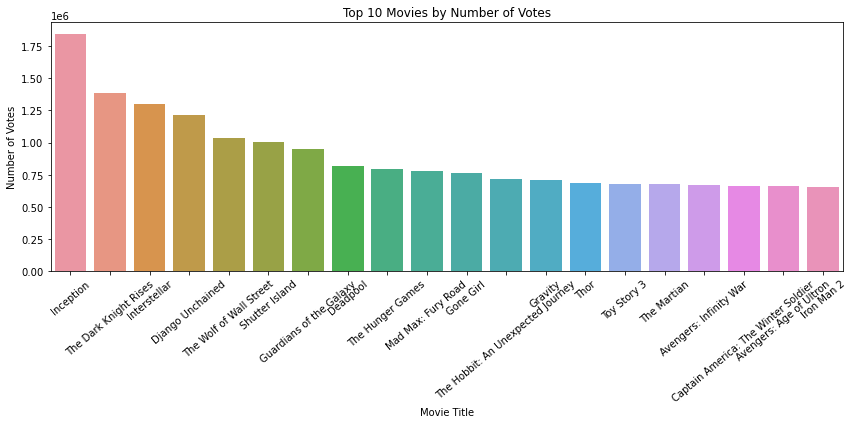

In [60]:
ratings_sorted = ratings.sort_values(by='numvotes', ascending=False)

# Select the top 10 movies
top_n = 20  # Number of top movies to display
top_movies = ratings_sorted.head(top_n)

# Create a bar plot using the top 10 movies
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="movie_title", y="numvotes", data=top_movies, ci=False)
plt.title(f"Top 10 Movies by Number of Votes")
plt.xticks(rotation=40)
plt.xlabel("Movie Title")
plt.ylabel("Number of Votes")
plt.tight_layout()

# Show the plot
plt.show()


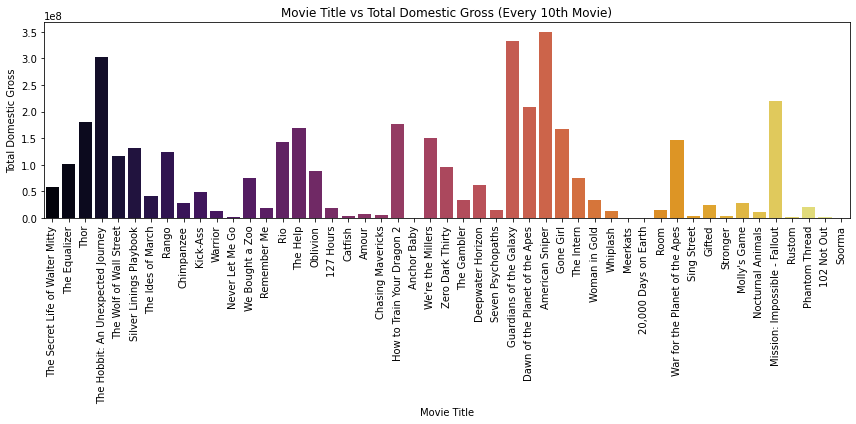

In [61]:
# Comparing The Movie Title with Domestic Gross
plt.figure(figsize=(12, 6))
sns.barplot(x="movie_title", y="domestic_gross", data=ratings.iloc[::10], palette="inferno")
plt.title("Movie Title vs Total Domestic Gross (Every 10th Movie)")
plt.xticks(rotation=90)
plt.xlabel("Movie Title")
plt.ylabel("Total Domestic Gross")
plt.tight_layout()
plt.show()


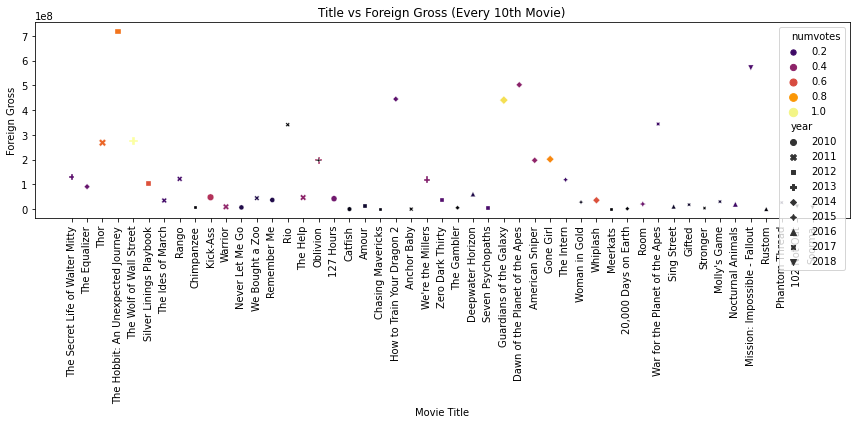

In [62]:

# Select every 10th movie title
n = 10
selected_titles = ratings.iloc[::n]['movie_title']

# Filter the data to include only the selected movie titles
filtered_data = ratings[ratings['movie_title'].isin(selected_titles)]

# Create a scatter plot using the filtered data
plt.figure(figsize=(12, 6))
sns.scatterplot(x="movie_title", y="foreign_gross", data=filtered_data,
                hue="numvotes", style="year", size="numvotes", palette="inferno")
plt.title("Title vs Foreign Gross (Every 10th Movie)")
plt.xticks(rotation=90)
plt.xlabel("Movie Title")
plt.ylabel("Foreign Gross")
plt.tight_layout()

# Show the plot
plt.show()


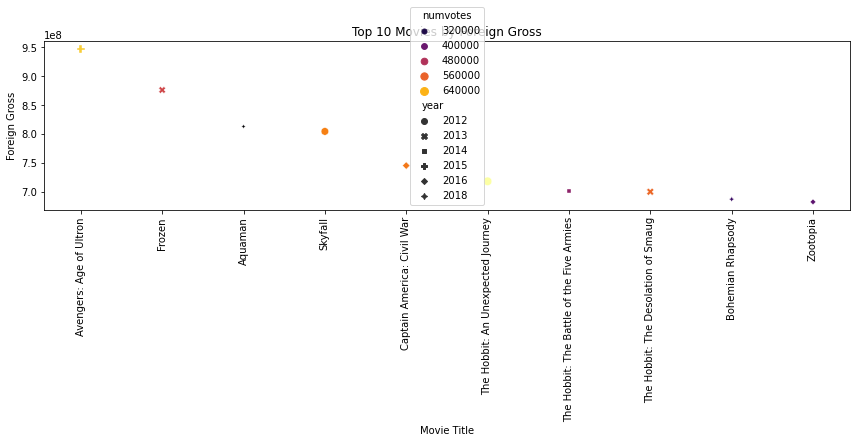

In [63]:

# Sort the data by 'foreign_gross' in descending order and select the top 10 movie titles
top_n = 10  # Replace with the desired number of top movie titles
top_movies = ratings.nlargest(top_n, 'foreign_gross')

# Create a scatter plot using the top 10 movies
plt.figure(figsize=(12, 6))
sns.scatterplot(x="movie_title", y="foreign_gross", data=top_movies,
                hue="numvotes", style="year", size="numvotes", palette="inferno")
plt.title(f"Top {top_n} Movies by Foreign Gross")
plt.xticks(rotation=90)
plt.xlabel("Movie Title")
plt.ylabel("Foreign Gross")
plt.tight_layout()

# Show the plot
plt.show()


Relating and investigating movie titles and the amount accumulated from foreign countries

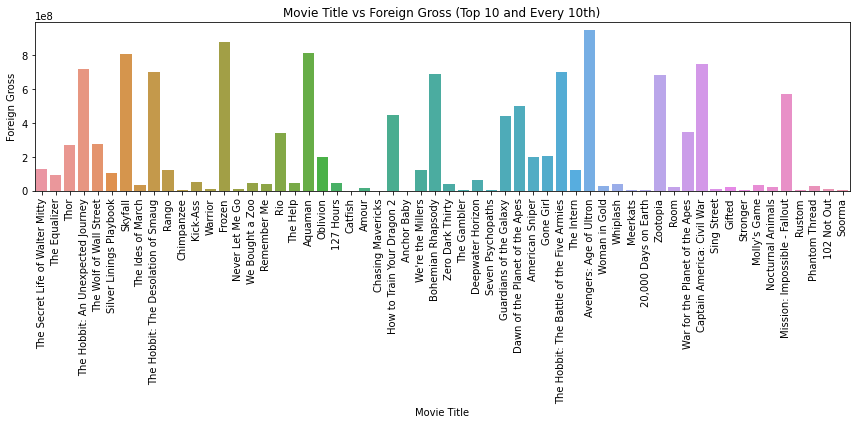

In [64]:
# Ploting with top 10 and 10th values
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have imported your 'ratings' DataFrame with the necessary data

# Sort the data by 'foreign_gross' in descending order and select the top 10 movie titles
top_n = 10  # Number of top movie titles to display
top_movies = ratings.nlargest(top_n, 'foreign_gross')

# Select every 10th movie title
n = 10  # Display every 10th movie title
selected_titles = ratings.iloc[::n]['movie_title']

# Filter the data to include only the top 10 movies and every 10th movie title
filtered_data = ratings[(ratings['movie_title'].isin(selected_titles)) | (ratings['movie_title'].isin(top_movies['movie_title']))]

# Create a bar plot using the filtered data
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="movie_title", y="foreign_gross", data=filtered_data, ci=False)
plt.title("Movie Title vs Foreign Gross (Top 10 and Every 10th)")
plt.xticks(rotation=90)
plt.xlabel("Movie Title")
plt.ylabel("Foreign Gross")
plt.tight_layout()

# Show the plot
plt.show()


Relation of Movie titles with the domestic home gross

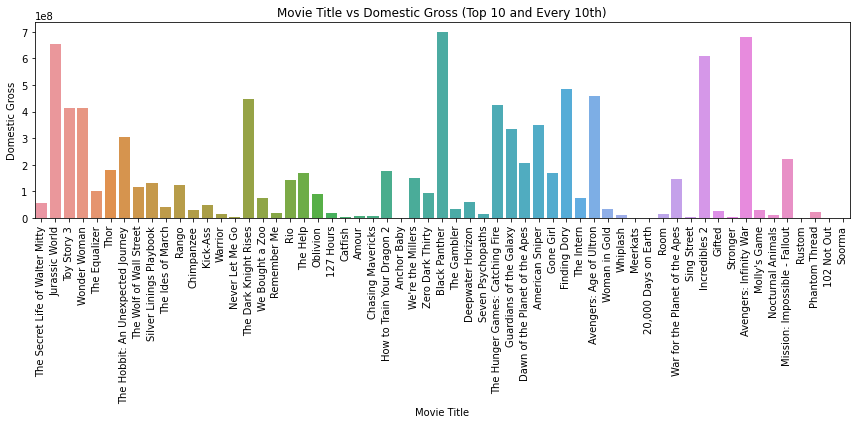

In [65]:
# Sort the data by 'domestic_gross' in descending order and select the top 10 movie titles
top_n = 10  # Number of top movie titles to display
top_movies = ratings.nlargest(top_n, 'domestic_gross')

# Select every 10th movie title
n = 10  # Display every 10th movie title
selected_titles = ratings.iloc[::n]['movie_title']

# Combine the two sets of movie titles
filtered_titles = list(set(selected_titles) | set(top_movies['movie_title']))

# Filter the data to include only the selected movie titles
filtered_data = ratings[ratings['movie_title'].isin(filtered_titles)]

# Create a bar plot using the filtered data
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="movie_title", y="domestic_gross", data=filtered_data, ci=False)
plt.title("Movie Title vs Domestic Gross (Top 10 and Every 10th)")
plt.xticks(rotation=90)
plt.xlabel("Movie Title")
plt.ylabel("Domestic Gross")
plt.tight_layout()

# Show the plot
plt.show()


Relation between genres and the number of people watching

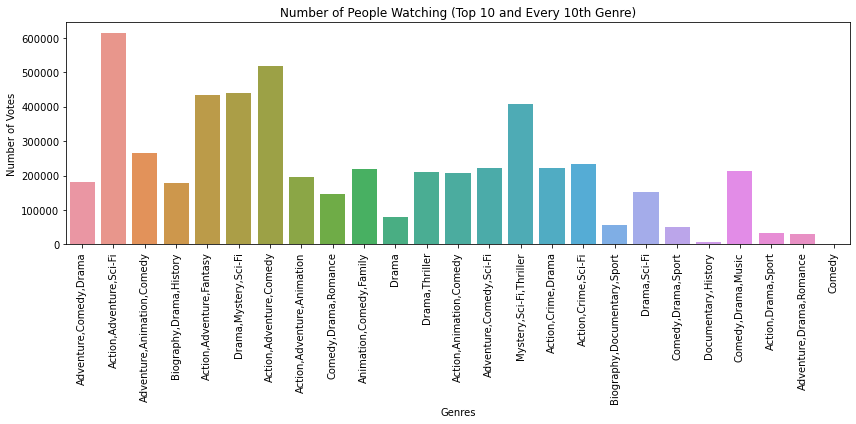

In [66]:
top_n = 10  # Number of top genres to display
top_genres = ratings.groupby("genres")["numvotes"].sum().nlargest(top_n).index

# Select every 10th genre
n = 10  # Display every 10th genre
selected_genres = ratings['genres'].unique()[::n]

# Combine the two sets of genres
filtered_genres = list(set(selected_genres) | set(top_genres))

# Filter the data to include only the selected genres
filtered_data = ratings[ratings['genres'].isin(filtered_genres)]

# Create a bar plot using the filtered data
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="genres", y="numvotes", data=filtered_data, ci=False)
plt.title("Number of People Watching (Top 10 and Every 10th Genre)")
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Number of Votes")
plt.tight_layout()

# Show the plot
plt.show()


Checking whether the no. of people watch movies by genres over the years 

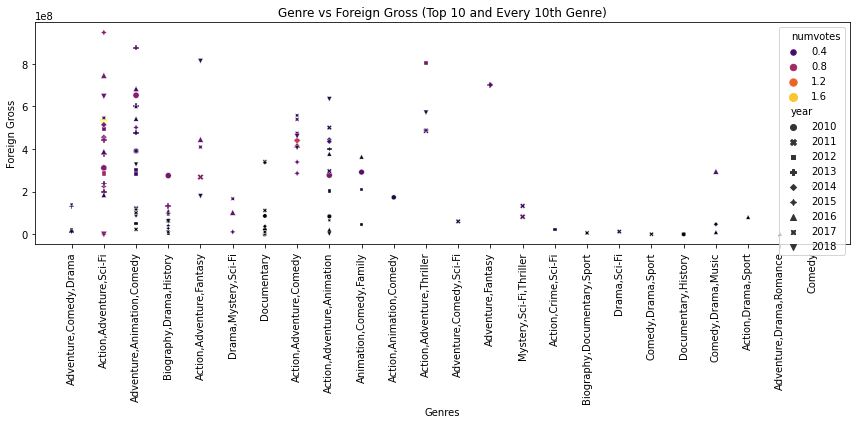

In [67]:
top_n = 10  # Number of top genres to display
top_genres = ratings.groupby("genres")["foreign_gross"].sum().nlargest(top_n).index

# Select every 10th genre
n = 10  # Display every 10th genre
selected_genres = ratings['genres'].unique()[::n]

# Combine the two sets of genres
filtered_genres = list(set(selected_genres) | set(top_genres))

# Filter the data to include only the selected genres
filtered_data = ratings[ratings['genres'].isin(filtered_genres)]

# Create a scatter plot using the filtered data
plt.figure(figsize=(12, 6))
sns.scatterplot(x="genres", y="foreign_gross", data=filtered_data,
                hue="numvotes", style="year", size="numvotes", palette="inferno")
plt.title("Genre vs Foreign Gross (Top 10 and Every 10th Genre)")
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Foreign Gross")
plt.tight_layout()

# Show the plot
plt.show()


Relation of movie genres and the amount of gross from foreign countries

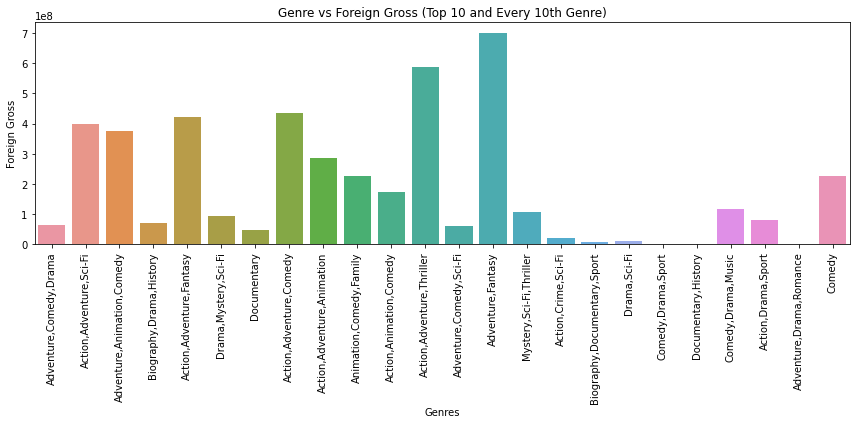

In [68]:
top_n = 10  # Number of top genres to display
top_genres = ratings.groupby("genres")["foreign_gross"].sum().nlargest(top_n).index

# Select every 10th genre
n = 10  # Display every 10th genre
selected_genres = ratings['genres'].unique()[::n]

# Combine the two sets of genres
filtered_genres = list(set(selected_genres) | set(top_genres))

# Filter the data to include only the selected genres
filtered_data = ratings[ratings['genres'].isin(filtered_genres)]

# Create a bar plot using the filtered data
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="genres", y="foreign_gross", data=filtered_data, ci=False)
plt.title("Genre vs Foreign Gross (Top 10 and Every 10th Genre)")
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Foreign Gross")
plt.tight_layout()

# Show the plot
plt.show()


Relation of movie genres based on the gross accumulated on the domestic country

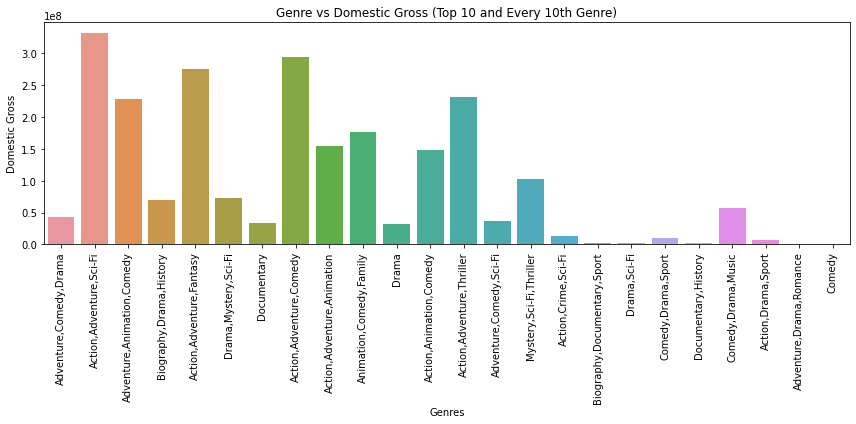

In [69]:
top_n = 10  # Number of top genres to display
top_genres = ratings.groupby("genres")["domestic_gross"].sum().nlargest(top_n).index

# Select every 10th genre
n = 10  # Display every 10th genre
selected_genres = ratings['genres'].unique()[::n]

# Combine the two sets of genres
filtered_genres = list(set(selected_genres) | set(top_genres))

# Filter the data to include only the selected genres
filtered_data = ratings[ratings['genres'].isin(filtered_genres)]

# Create a bar plot using the filtered data
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="genres", y="domestic_gross", data=filtered_data, ci=False)
plt.title("Genre vs Domestic Gross (Top 10 and Every 10th Genre)")
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Domestic Gross")
plt.tight_layout()

# Show the plot
plt.show()


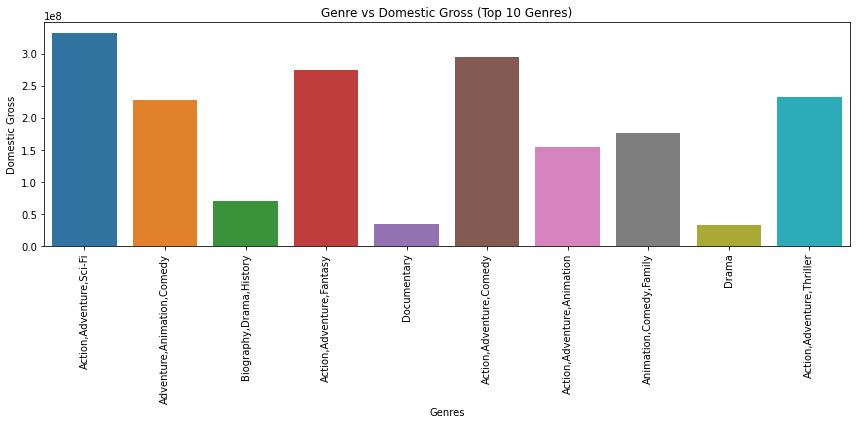

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have imported your 'ratings' DataFrame with the necessary data

# Sort the data by 'domestic_gross' in descending order and select the top 10 genres
top_n = 10  # Number of top genres to display
top_genres = ratings.groupby("genres")["domestic_gross"].sum().nlargest(top_n).index

# Filter the data to include only the top 10 genres
filtered_data = ratings[ratings['genres'].isin(top_genres)]

# Create a bar plot using the filtered data
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="genres", y="domestic_gross", data=filtered_data, ci=False)
plt.title("Genre vs Domestic Gross (Top 10 Genres)")
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Domestic Gross")
plt.tight_layout()

# Show the plot
plt.show()


### Conclusion

From the above Observations from the Bar Charts based on both Local Gross and Foreign Gross:


* Interception is the most watched movie
* Internationally the Bohemian Rhapsody is the highest selling movie
* Locally Avengers Infinnity  was the highest in selling
* The Best Genre Movie that is majorly with a large audience is Action, Adventure SciFi Movies
* Action Thriller Movies are the most watched
* Biography, Dramma, Music is the Most selling genre sold internationally

### Recommendation

Based on The Market for Local and International in this case Foreign, i would advise the Managers of Microsoft to:

> They should invest in Adventure, Animation, Comedy and Action, Thriller Movies and Biography, Drama, Music Genres for International Market. This is because they have the highest selling rates in Foreign Countries.

>  Action, adventure sci-fi movies have the highest number of people watching them both locally and  foreign countries and thus should be given a priority when Investing in the movie industries

> Also Adventure, drama, sci-fi movies, action thrillers, and western drama are the highest-watched genres 

It Was A Happy Hacking